In [3486]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [3487]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3488]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [3489]:
%matplotlib inline

In [3490]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [3491]:
# make sure that matplotib and seaborn can show Chinese
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [3492]:
# Files to use 
filenamePrice = 'Own_Factor_AdjustedPriceForward-1d.csv'
filenameST = 'LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday = 'LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag = 'LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu = 'LZ_GPA_INDU_ZX.csv'
filenameFCAP = 'LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor = 'LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'
filenameZXIndustry = 'LZ_GPA_INDU_ZX.csv'
filenameZXExplanation = 'LZ_GPA_TMP_INDU_ZX.csv'

In [3493]:
# Factors
# Value factor
filenamePE ='LZ_GPA_VAL_PE.csv'  # 市盈率   012-2016 Cum return 0.9(group1),1.4(group8) monotonicity: Normal
filenamePB ='LZ_GPA_VAL_PB.csv'  # 市净率   012-2016 Cum return 1.1(group2),0.1(group9) monotonicity: Good+
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率   012-2016 Cum return 0.9(group0),0.3(group9) monotonicity: Good+
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率   2012-2016 Cum return 0.95(group0),0.35(group8) monotonicity: Normal
filenameADJPB ='Own_Factor_AdjustedPB-1d.csv' # 市值调整市净率 2012-2016 Cum return 1.1(group2),0.2(group9) monotonicity: Normal

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%) 2012-2016 Cum return 1.1(group8),0.41(group1) monotonicity: Good+
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%) 2012-2016 Cum return 1.2(group9),0.2(group1) monotonicity: Good
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%) 2012-2016 Cum return 0.98(group8),0.4(group2) monotonicity: Good
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%) 2012-2016 Cum return 1.17(group7),0.18(group1) monotonicity: Normal
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)  2012-2016 Cum return 0.85(group4),0.5(group0) monotonicity: Normal

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销 2012-2016 Cum return 0.95(group0),0.6(group9) monotonicity: Normal+
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率 2012-2016 Cum return 0.85(group0),0.53(group2) monotonicity: Normal+
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债 2012-2016 Cum return 0.8(group7),0.6(group8) monotonicity: Normal
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计 2012-2016 Cum return 0.8(group0),0.55(group4) monotonicity: Normal
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入 2012-2016 Cum return 0.84(group3),0.23(group9) monotonicity: Normal
filenamePROFITTOOPTTM ='LZ_GPA_FIN_DERI_COMBO_EBTTOOR_TTM.csv' # # 利润总额／营业收入(TTM) 2012-2016 Cum return 0.72(group8),0.41(group1) monotonicity: Good

filenameBERYRATIO = 'LZ_GPA_DERI_BerryRatio.csv' #边际毛利/营运开支 2012-2016  monotonicity: bad ,not useful at all

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量 2012-2016 Cum return 1.0(group3), - 0.3(group9) monotonicity: Normal+
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转 2012-2016 Cum return 0.85(group0), - 0.2(group9) monotonicity: Good
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转 2012-2016 Cum return 0.65(group7), 0.4(group9) monotonicity: Normal
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度  2012-2016 Cum return 0.47(group0), -0.3(group9) monotonicity: Good
filenameABORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量  2012-2016 Cum return 0.7(group0), 0.1(group9) monotonicity: Normal
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv' # 斜率   2012-2016 Cum return 1.1(group0), 0.25(group8) monotonicity: Good+
filenameMACD = 'LZ_GPA_DERI_MACD.csv'  # MACD   2012-2016 Cum return 0.8(group3), -0.4(group9) monotonicity: Normal
finenameBB = 'LZ_GPA_DERI_BB_20.csv'  # Bolling_bands  2012-2016 Cum return 0.75(group3) , 0.05(group9)  monotonicity: Normal 

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值 2012-2016 Cum return 0.7(group4) , 0.1(group9)  monotonicity: Normal 
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'    #  日均成交额   2012-2016 Cum return 1.52(group0) , -0.27(group9)  monotonicity: Perfect
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'         # 非流动性因子  2012-2016 Cum return 1.5(group9), - 0.07(group1) monotonicity: Perfect
filenameTURNOVER = 'LZ_GPA_VAL_TURN.csv'    # 换手率 2012-2016 Cum return  0.78(group6), - 0.25(group9) monotonicity: Normal（除了第九组外其他差不多）
filenameOWNILLIQ ='Own_Factor_ILLQ-1d.csv' # 非流动性 2012-2016 Cum return 1.5(group9), - 0.25(group0) monotonicity: Perfect
filenameADJILLIQ = 'Own_Factor_ADJ_ILLQ_1D.csv' # 非流动性(市值调整) 
filenameADJTURNOVER = 'LZ_GPA_DERI_adjustedTurnOver_20.csv' # 市值调整日均成交额 2012-2016 Cum return 1.25(group0), - 0.5(group9) monotonicity: Perfect

# Volatility factor
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动   2012-2016 Cum return  0.65(group8), 0.4(group1) monotonicity : Normal
filenameOwnVol = 'Own_Factor_Volatility_90d.csv'   # 90天收益波动率     2012-2016 Cum return 0.65(group1), - 0.26(group9) monotonicity: Good
filenameAbove20 = 'Own_Factor_Above20MA_20d.csv'  # 高于20天MA的价格平均 2012-2016 Cum return 0.8(group1) , -0.4(group9)  monotonicity：Good

filenameTOV20 = 'Own_Factor_Turnover_Volatility_20D.csv' # 20天换手率波动率
filenameADJTOV20 = 'Own_Factor_ADJ_Turnover_Volatility_20D.csv' # 20天换手率波动率（市值调整） 2012-2016 Cum return 1.8(group0), -0.3(group9) monotonicity: perfect
filenameTOVD20 = 'Own_Factor_Turnover_Volatility_deviation_20D.csv' # 20天换手率均值除500天换手率均值-1
filenameADJTOVD20 = 'Own_Factor_ADJ_Turnover_Volatility_Deviation_20D.csv' # 20天换手率均值除500天换手率均值-1(市值调整)  Cum return 0.7(group0), -0.2(group9)Good

In [3494]:
#
#filenameSpecificVol = 'Own_Factor_Specific_Volatility.csv' # 特质波动率
filenameAroon = 'Aroon_Allstocks.csv' 
filenameAdjTOTrue = 'Own_Factor_AdjustedTurnOver-1d.csv'# 真市值调整换手率 2012-2016 Cum return 1.0(group7), - 0.4(group9) monotonicity: Normal
filenameDDA = 'Own_Factor_DDA-1d.csv'  # 股票每日成交额(前复权)  2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filennameQFAEPS = 'LZ_GPA_FIN_IND_QFA_EPS.csv' # 单季度每股收益
filenameDDA20 = 'Own_Factor_DDA-20d.csv' # DDA二十天均值   2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filenameADJDDA20 ='Own_Factor_ADJ_DDA_20D.csv' # 中性化（仅去市值）后的DDA20
filenameIDIVOL = 'Own_Factor_Idiosyncratic_Volatility.csv' # 特异波动率  2012-2016 Cum return 0.9(group1), 0(group9) monotonicity: Good+
filenameOwnSkewness = 'Own_Factor_Skewness_250d.csv'  # 250日偏度
filenameOwnReturnSkew = 'Own_Factor_Return_Skew_250D.csv' # 250日收益率偏度
filenamePPO ='LZ_GPA_DERI_PPO.csv' #

In [3495]:
# Not good factors but maybe useful
filenameOVERVOL = 'Over_Heat_Volume.csv' 
filenameSIZE = 'LZ_GPA_VAL_A_FCAP.csv'

In [3496]:
# Non_linear factor
filenameNLFCAP ='Own_factor_Nonlinear_FCAP.csv'

In [3497]:
# Constants
startTime =  datetime.strptime('20100101', '%Y%m%d')
endTime = datetime.strptime('20170228', '%Y%m%d')

path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HS300Index ='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [3498]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
indusDF = pd.read_csv(path+filenameZXIndustry,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
induExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')

In [3499]:
#
sololist = [filenameOwnReturnSkew  ]
#
filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'TURNOVER_1M':filenameTURNOVER1M }

In [3500]:
induExplanation

,LZ_GPA_TMP_INDU_ZX-t
0,石油石化
1,煤炭
2,有色金属
3,电力及公用事业
4,钢铁
5,基础化工
6,建筑
7,建材
8,轻工制造
9,机械


In [3501]:
explanationDict = induExplanation.iloc[:,0].to_dict()

In [3502]:
stDF.head()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,603728.SH,603896.SH,603926.SH,002871.SZ,603086.SH,603113.SH,603180.SH,002869.SZ,002870.SZ,601952.SH
LZ_GPA_SLCIND_ST_FLAG-t,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3503]:
## easy way to calculate the last day of the month
stDF['label'] = stDF.index.map(lambda x: (x.year,x.month))
#locationList=(stDF.groupby(['label']).size().cumsum()-1).values
#stDF.iloc[locationList].index
stDF.groupby(['label'])

In [3504]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime][ZZ500Index]

In [3505]:
LFCAPDF = np.log10(ff.getData(filenameFCAP, thresholdNum, startTime, endTime))

In [3506]:
#fs = np.log10(pd.read_csv(path+ filenameFCAP ,infer_datetime_format=True,parse_dates=[0],index_col=0))

#fs[fs>fs.quantile(0.9,axis=1)] = np.NaN
#fs.to_csv(path+'Own_factor_Nonlinear_FCAP.csv',na_rep='NaN',date_format='%Y%m%d')

In [3507]:
#fs[fs<fs.quantile(0.4,axis=1)]

In [3508]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [3509]:
# calculate correlation between two factors
factor1 = pd.read_csv(path+sololist[0],infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
correlationDF = ff.showCorrelation(factor1,LFCAPDF, endOfMonthList, filterdic = None).astype(float)
correlationDF.describe()

,Pearson,Spearman
count,86.000000,86.000000
mean,0.064680,0.185039
std,0.085394,0.061368
min,-0.047698,-0.016168
25%,-0.021316,0.139516
50%,0.079859,0.202274
75%,0.129674,0.227307
max,0.246397,0.296185


In [3510]:
#%lprun -f ff.getLastDayOfMonth ff.getLastDayOfMonth(LFCAPDF.index)

In [3511]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [3512]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2010-01-29 00:00:00 297
2010-02-26 00:00:00 332
2010-03-31 00:00:00 341
2010-04-30 00:00:00 343
2010-05-31 00:00:00 349
2010-06-30 00:00:00 347
2010-07-30 00:00:00 332
2010-08-31 00:00:00 324
2010-09-30 00:00:00 323
2010-10-29 00:00:00 327
2010-11-30 00:00:00 330
2010-12-31 00:00:00 339
2011-01-31 00:00:00 349
2011-02-28 00:00:00 375
2011-03-31 00:00:00 373
2011-04-29 00:00:00 376
2011-05-31 00:00:00 337
2011-06-30 00:00:00 361
2011-07-29 00:00:00 329
2011-08-31 00:00:00 322
2011-09-30 00:00:00 319
2011-10-31 00:00:00 299
2011-11-30 00:00:00 308
2011-12-30 00:00:00 311
2012-01-31 00:00:00 292
2012-02-29 00:00:00 288
2012-03-30 00:00:00 328
2012-04-27 00:00:00 376
2012-05-31 00:00:00 316
2012-06-29 00:00:00 322
2012-07-31 00:00:00 262
2012-08-31 00:00:00 244
2012-09-28 00:00:00 229
2012-10-31 00:00:00 208
2012-11-30 00:00:00 202
2012-12-31 00:00:00 192
2013-01-31 00:00:00 186
2013-02-28 00:00:00 186
2013-03-29 00:00:00 194
2013-04-26 00:00:00 188
2013-05-31 00:00:00 182
2013-06-28 00:00

In [3513]:
### Calculate the return of each group of given factor(solo factor)
totalGroupDict ={}
factorData = ff.getData(sololist[0], thresholdNum, startTime, endTime)

for date in endOfMonthList:
    factorDataTemp = factorData.loc[:date].tail()
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
    #print factorDataTemp
    totalGroupDict[date] = ff.getStockGroup(factorDataTemp,groupNum=10,Mean_Num=1)

In [3514]:
ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None, dtype =float)
sizeDistribution = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None, dtype =float)
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
        sizeDistribution.loc[time][group] = LFCAPDF.loc[time][totalGroupDict[time][group]].quantile()
ReturnDF.sort_index(axis=1,inplace=True)
sizeDistribution.sort_index(axis=1,inplace=True)

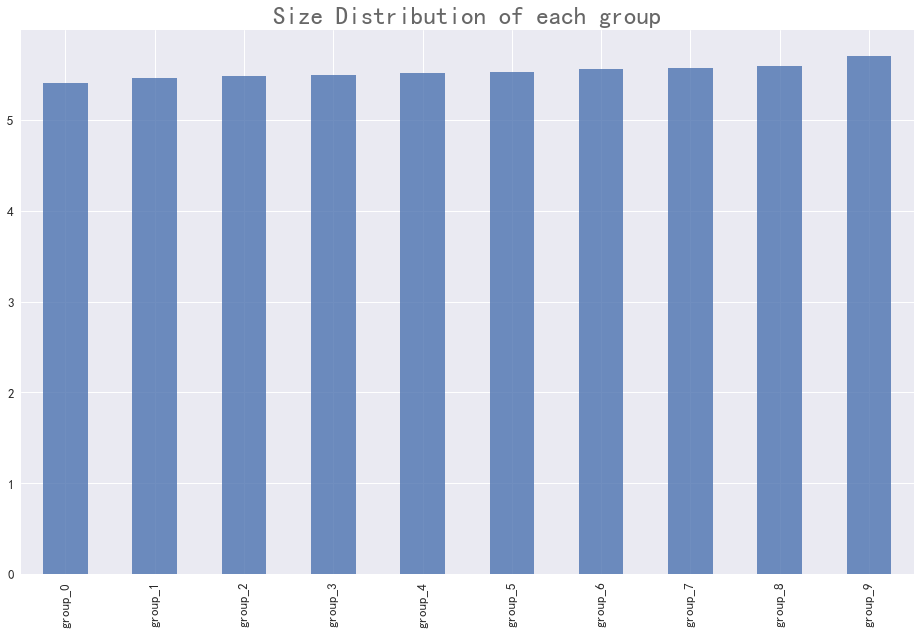

In [3515]:
# show size distribution(quantile plot)
fig = plt.figure(figsize=(16,10))
# Add a subplot
ax = fig.add_subplot(111)
sizeDistribution.median().plot(kind='bar',ax = ax, fontsize =13,title ='Size Distribution of each group',alpha =0.8)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=25)

In [3516]:
sizeDistribution.quantile()
sizeMono = sizeDistribution.quantile().corr(pd.Series(index = sizeDistribution.quantile().index,data = range(len(sizeDistribution.quantile()))),\
                                           method = 'spearman')
sizeMono

0.99999999999999989

In [3517]:
# Calc spearman correlation to investigate monotonicity
referSeries = pd.Series(index = ReturnDF.columns, data=range(len(ReturnDF.columns)))
monoDF = pd.DataFrame(index = ReturnDF.index, columns=['Spearman_Cor'], dtype = float)
for date in ReturnDF.index:
    monoDF.loc[date] = ReturnDF.loc[date].corr(referSeries,method='spearman')   

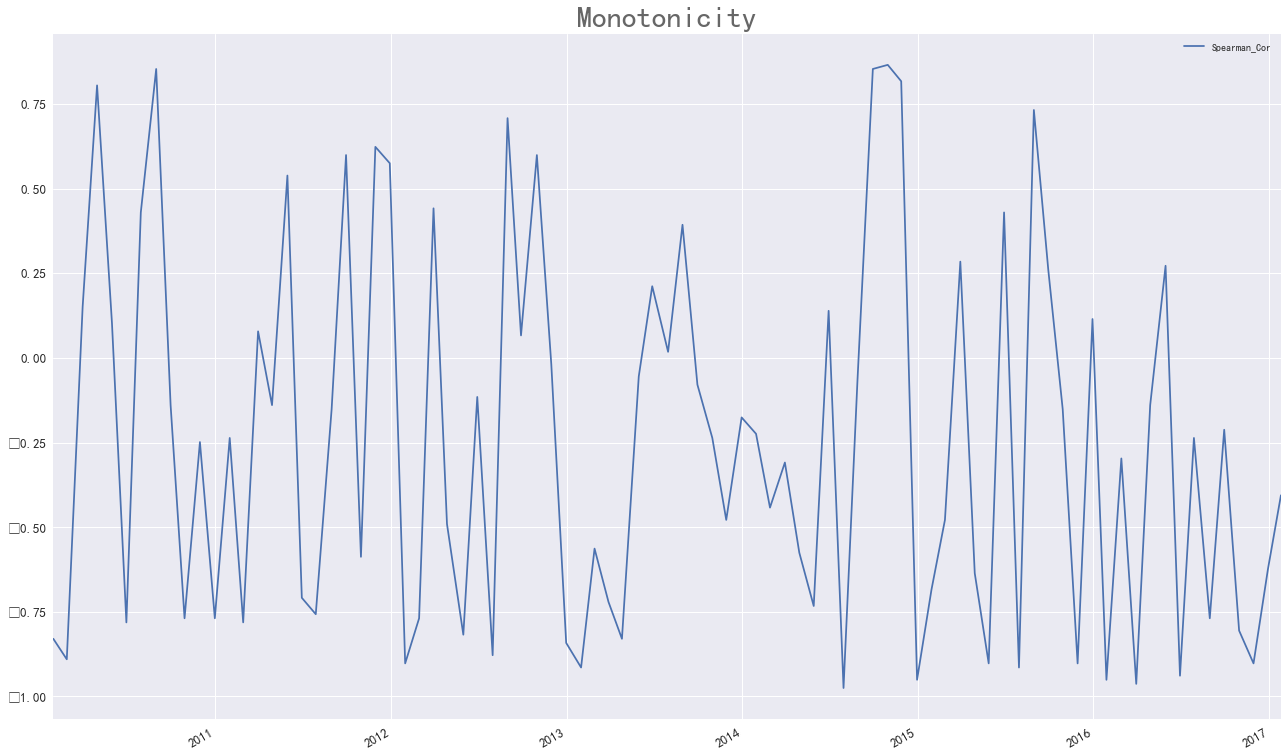

In [3518]:
# Plot
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
monoDF.plot(figsize=(22,14),ax=ax,fontsize =13,title ='Monotonicity')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [3519]:
### Method to calculate moving max drawdown
from numpy.lib.stride_tricks import as_strided
def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y

In [3520]:
###
def rolling_max_dd(x, window_size, min_periods=1):
    """Compute the rolling maximum drawdown of `x`.

    `x` must be a 1d numpy array.
    `min_periods` should satisfy `1 <= min_periods <= window_size`.

    Returns an 1d array with length `len(x) - min_periods + 1`.
    """
    if min_periods < window_size:
        pad = np.empty(window_size - min_periods)
        pad.fill(x[0])
        x = np.concatenate((pad, x))
    y = windowed_view(x, window_size)
    #print y
    rolling_max_y = np.maximum.accumulate(y, axis=1)
    #print rolling_max_y
    dd = 1-y/rolling_max_y
    return np.abs(dd).max(axis=1)

In [3521]:
max(rolling_max_dd(ReturnDF['group_0'].values,4, min_periods=1))

33.388365778503385

In [3522]:
# long top group short bot group 
sortGroups = ReturnDF[['group_0','group_9']].cumsum().iloc[-1].sort_values(ascending = False).index
top, bot = sortGroups[0], sortGroups[-1]

# Add another column
ReturnDF['top_bot_comb'] = ReturnDF[top] - ReturnDF[bot]

In [3523]:
top, bot

('group_0', 'group_9')

In [3524]:
ReturnDF.cumsum().tail()

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9,top_bot_comb
2016-09-30,1.048894,0.809783,0.671133,0.638652,0.443930,0.423446,0.450758,0.296841,0.313179,0.275134,0.773760
2016-10-31,1.071964,0.823297,0.676358,0.645101,0.446539,0.429860,0.447407,0.296606,0.316060,0.273549,0.798414
2016-11-30,1.108523,0.844220,0.692684,0.659580,0.457944,0.428402,0.452906,0.302105,0.309497,0.273137,0.835387
2016-12-30,1.112761,0.845168,0.688947,0.646448,0.453964,0.419887,0.436147,0.303326,0.297380,0.240564,0.872197
2017-01-26,1.121035,0.853723,0.688101,0.650036,0.451634,0.427990,0.436391,0.308154,0.289528,0.244908,0.876128


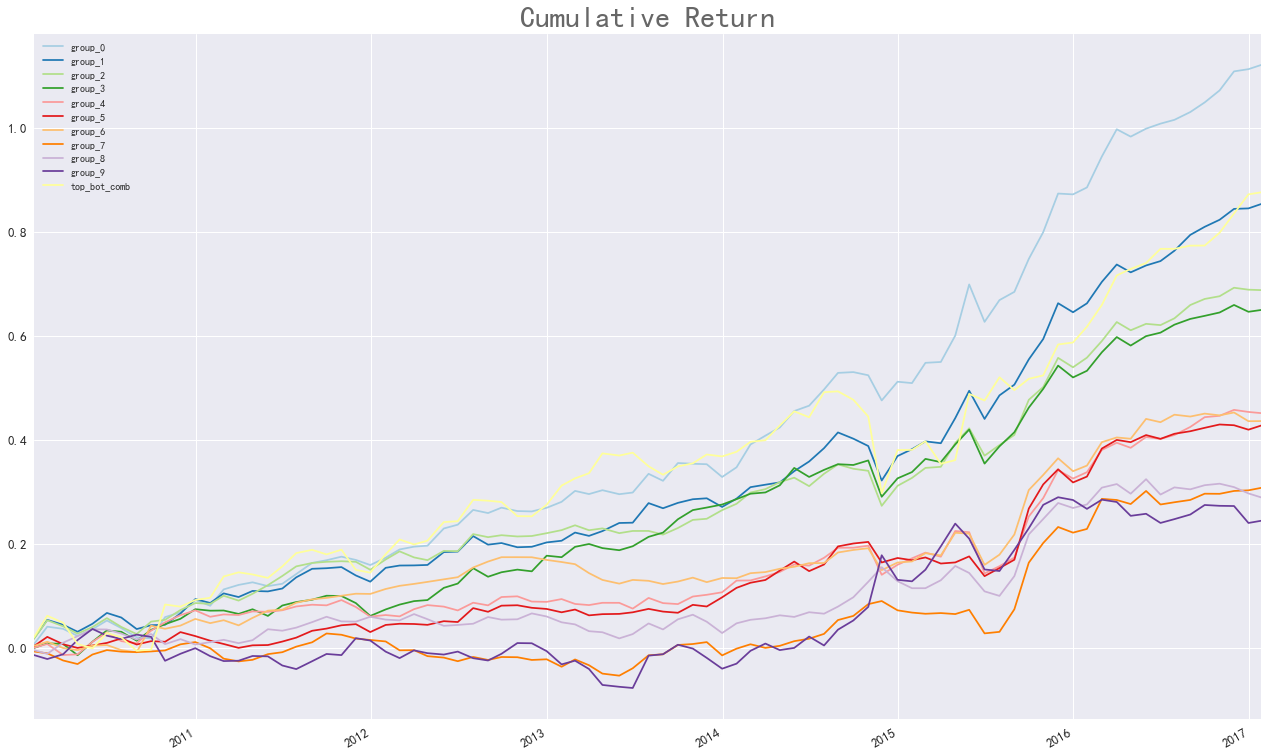

In [3525]:
# simple cumulative return 
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
ReturnDF.astype(float).cumsum().plot(figsize=(22,14),ax=ax,  color=sns.color_palette("Paired",11),fontsize =13,title ='Cumulative Return')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

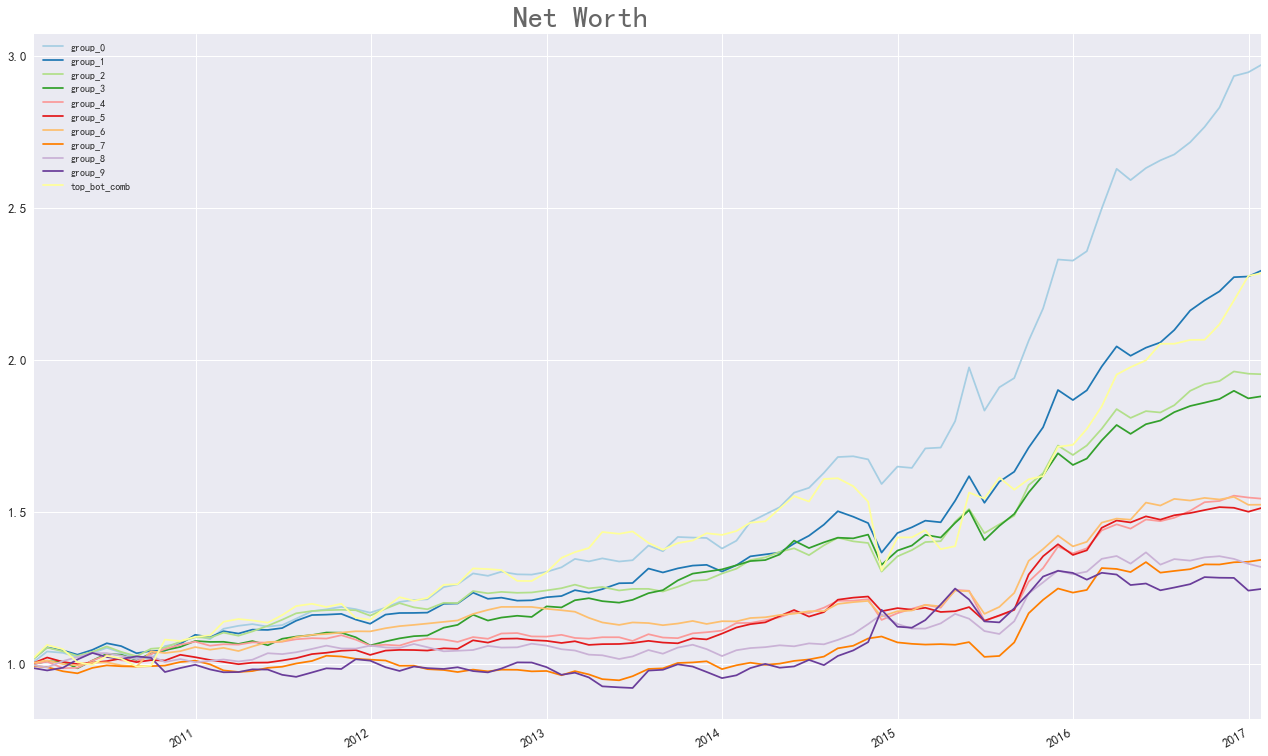

In [3526]:
# Net worth plot 
netWorthDF = (ReturnDF.astype(float)+1).cumprod()
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
netWorthDF.plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",11),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [3527]:
# Calc spearman correlation to investigate monotonicity
referSeries = pd.Series(index = netWorthDF.iloc[:,:-1].columns, data=range(len(netWorthDF.iloc[:,:-1].columns)))
monoDF = pd.DataFrame(index = netWorthDF.index, columns=['Spearman_Cor'], dtype = float)
for date in netWorthDF.index:
    monoDF.loc[date] = netWorthDF.iloc[:,:-1].loc[date].corr(referSeries,method='spearman')   

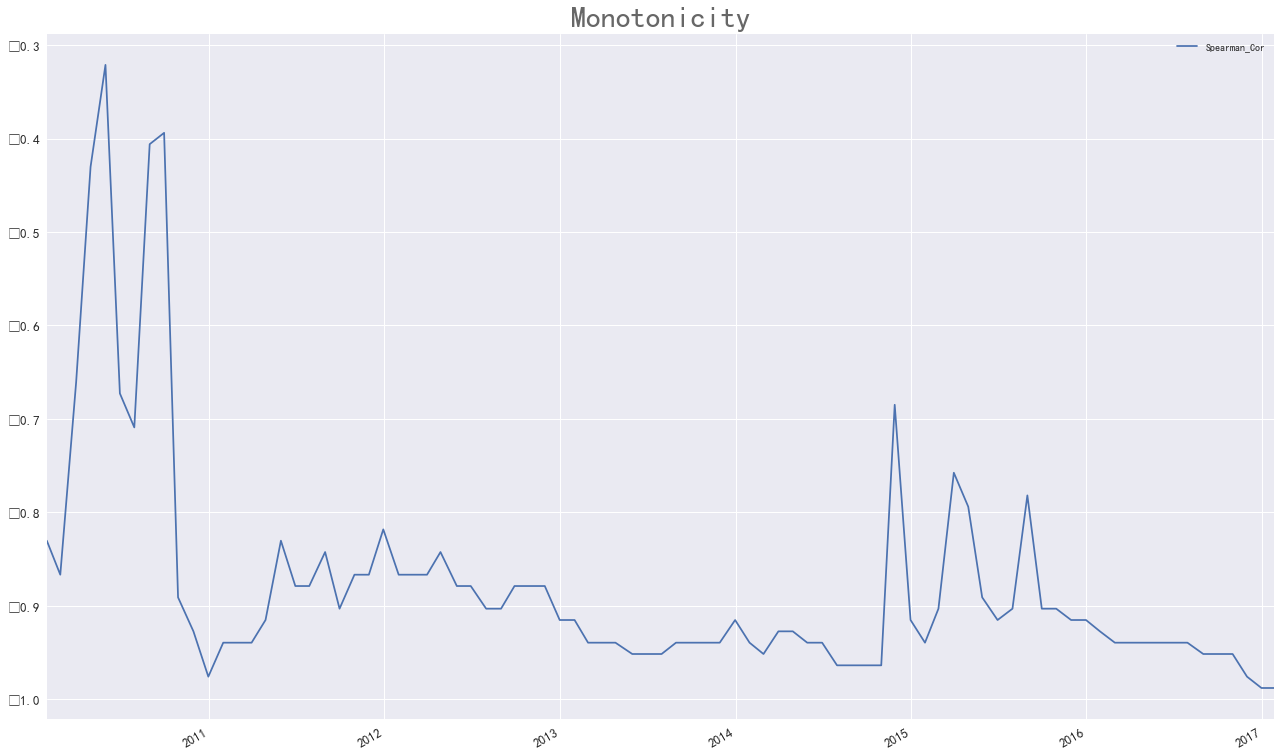

In [3528]:
# Plot
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
monoDF.plot(figsize=(22,14),ax=ax,fontsize =13,title ='Monotonicity')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [3529]:
# monotonicity information 
print monoDF.std()
print monoDF.median()

Spearman_Cor    0.127989
dtype: float64
Spearman_Cor   -0.915152
dtype: float64


In [3530]:
# basic indicator
annualizedReturn = (1+ReturnDF.mean())**12 - 1
annualizedVol = ReturnDF.std()* np.sqrt(12)
sharpeRatio = annualizedReturn / annualizedVol 
print 'Annual Return:','\n',annualizedReturn,'\n\n','Annual Volatility:','\n',annualizedVol,'\n\n','Sharpe Ratio:''\n',sharpeRatio

Annual Return: 
group_0         0.170264
group_1         0.127411
group_2         0.101588
group_3         0.095730
group_4         0.065657
group_5         0.062124
group_6         0.063378
group_7         0.044382
group_8         0.041649
group_9         0.035128
top_bot_comb    0.130947
dtype: float64 

Annual Volatility: 
group_0         0.085432
group_1         0.074289
group_2         0.067290
group_3         0.067354
group_4         0.067553
group_5         0.060787
group_6         0.063155
group_7         0.060891
group_8         0.058885
group_9         0.082889
top_bot_comb    0.113510
dtype: float64 

Sharpe Ratio:
group_0         1.992975
group_1         1.715090
group_2         1.509705
group_3         1.421286
group_4         0.971933
group_5         1.021992
group_6         1.003523
group_7         0.728876
group_8         0.707296
group_9         0.423800
top_bot_comb    1.153623
dtype: float64


In [3531]:
downsideRisk = ReturnDF[ReturnDF < ReturnDF.mean()].std(skipna = True) * np.sqrt(12)
downsideRisk

group_0         0.052635
group_1         0.051706
group_2         0.049771
group_3         0.058899
group_4         0.052066
group_5         0.034280
group_6         0.041139
group_7         0.032254
group_8         0.029172
group_9         0.046646
top_bot_comb    0.085509
dtype: float64

In [3532]:
sortinoRatio = annualizedReturn / downsideRisk
sortinoRatio

group_0         3.234830
group_1         2.464163
group_2         2.041110
group_3         1.625325
group_4         1.261025
group_5         1.812221
group_6         1.540565
group_7         1.376036
group_8         1.427730
group_9         0.753088
top_bot_comb    1.531393
dtype: float64

In [3533]:
# Max drawdown
maxdd = netWorthDF.copy()
maxdd.iloc[0] = 0
for date in netWorthDF.index[1:]:
    maxdd.loc[date] = 1-netWorthDF.loc[date]/netWorthDF.loc[:date].max()
maxddInfo = pd.concat([maxdd.max(),maxdd.idxmax()],axis=1)
maxddInfo.columns = ['Max_drawdown','Time']
maxddInfo

,Max_drawdown,Time
group_0,0.071950,2015-06-30
group_1,0.090534,2014-11-28
group_2,0.078751,2014-11-28
group_3,0.069785,2014-11-28
group_4,0.081258,2015-06-30
group_5,0.065314,2015-06-30
group_6,0.061583,2015-06-30
group_7,0.078568,2013-05-31
group_8,0.056628,2015-07-31
group_9,0.111264,2013-06-28


In [3534]:
# calmar Ratio
calmarRatio = annualizedReturn/ maxddInfo['Max_drawdown']
calmarRatio 

group_0         2.366404
group_1         1.407334
group_2         1.289979
group_3         1.371784
group_4         0.808003
group_5         0.951153
group_6         1.029139
group_7         0.564884
group_8         0.735481
group_9         0.315722
top_bot_comb    0.694857
dtype: float64

In [3535]:
ReturnForPlot =ReturnDF.copy()

In [3536]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month < 12 else\
                                             100*(x.year+1)+1) ### this shows the real time

In [3537]:
### the following part is to save return data of every factor into one Dataframe

In [3538]:
#---------------- the following part shows the show the difference of a risk factor across different market capitalzation size----#
#-------------  and different industries ------#

In [3539]:
# show the difference of a risk factor through different market capitalzation size
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the tuple of the groups
# Inputs: 
# capdata: DATAFRAME ,the LFCAP DATA
# datelist: LIST, the datelist of the end month
def getGroupsbyCap(capdata, datelist):
    capdict ={}
    for date in datelist:
        capdataindice = capdata.loc[date]
        lower = capdataindice.quantile(1/3)
        upper = capdataindice.quantile(2/3)
        smallcap = capdataindice[capdataindice<=lower].index
        midcap = capdataindice[(lower<capdataindice) & (capdataindice<=upper)].index
        hugecap = capdataindice[capdataindice>upper].index
        capdict[date] = (smallcap,midcap,hugecap)
    return capdict

In [3540]:
# industry number
grouplabel = np.random.choice(29,10,replace=False)
grouplabel

array([11, 15, 10,  1, 12, 24,  4, 20, 28,  9])

In [3541]:
# show the difference of a risk factor through different industry
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the DICTIONARY of the groups of each industry on that day
# Inputs: 
# datelist: LIST, the datelist of the end month
# grouplable: LIST, the industry label,usually 3 of them is constant and other 3 is randomed  alike [2,3,6,15,18,25]
# industryDF: DATAFRAME,the industry dataframe(could )
def getIndustryDict(datelist,grouplabel,industryDF):
    industrydict = {}
    industryDF = industryDF.loc[datelist]
    for date in datelist:
        industryDFindice = industryDF.loc[date]
        industrydict[date] = {label:industryDFindice[industryDFindice == label].index for label in grouplabel}
    return industrydict

In [3542]:
#------------------------------ Following part is to group  stocks within industry --------------------------

In [3543]:
wholeIndList = np.array(range(29))

wholeIndDict = getIndustryDict(endOfMonthList,wholeIndList,indusDF)

In [3544]:
multindexList = [endOfMonthList,wholeIndList]
induReturnDF  = pd.DataFrame(data=None, columns=totalGroupDict.values()[0].keys(),\
                             index=pd.MultiIndex.from_product(multindexList,names=['time','industry']),dtype=float)

In [3545]:
groupNumberThrottle = 10
for i,j in wholeIndDict.iteritems():
    print i
    factorIndice = factorData.loc[:i].tail()
    factorIndice = factorIndice[list(set(factorIndice.columns.tolist())- set(filterdict[date]))]  # Remove ST ,new and suspend stk
    for ind, stk in j.iteritems():
        intersection = list(set(factorIndice.columns.tolist()) & set(stk))
        if len(intersection) < groupNumberThrottle:
            induReturnDF.loc[i,ind] = 0
            continue
        else:
            stkgroup = ff.getStockGroup(factorIndice[intersection], groupNum=10, Mean_Num=1)
            for p,q in stkgroup.iteritems():
                try:
                    induReturnDF.loc[i,ind][p] = activeReturnData.loc[i][q].mean()
                except:
                    induReturnDF.loc[i,ind][p] = np.NaN

2016-12-30 00:00:00
2010-12-31 00:00:00
2015-05-29 00:00:00
2014-02-28 00:00:00
2012-03-30 00:00:00
2014-07-31 00:00:00
2012-11-30 00:00:00
2016-09-30 00:00:00
2013-07-31 00:00:00
2012-08-31 00:00:00
2014-11-28 00:00:00
2012-07-31 00:00:00
2012-04-27 00:00:00
2016-05-31 00:00:00
2014-05-30 00:00:00
2012-02-29 00:00:00
2013-09-30 00:00:00
2015-02-27 00:00:00
2015-07-31 00:00:00
2011-06-30 00:00:00
2011-05-31 00:00:00
2010-10-29 00:00:00
2010-11-30 00:00:00
2013-03-29 00:00:00
2010-07-30 00:00:00
2015-11-30 00:00:00
2012-05-31 00:00:00
2011-11-30 00:00:00
2011-07-29 00:00:00
2015-12-31 00:00:00
2011-02-28 00:00:00
2013-11-29 00:00:00
2016-03-31 00:00:00
2015-06-30 00:00:00
2011-04-29 00:00:00
2010-08-31 00:00:00
2013-01-31 00:00:00
2015-01-30 00:00:00
2011-12-30 00:00:00
2010-03-31 00:00:00
2011-03-31 00:00:00
2017-01-26 00:00:00
2011-09-30 00:00:00
2010-04-30 00:00:00
2016-10-31 00:00:00
2011-10-31 00:00:00
2012-06-29 00:00:00
2013-02-28 00:00:00
2014-09-30 00:00:00
2012-12-31 00:00:00


In [3546]:
finalReturn = induReturnDF.mean(level = 'time')
finalReturn.sort_index(axis=1,inplace=True)

In [3547]:
sortGroups = finalReturn[['group_0','group_9']].cumsum().iloc[-1].sort_values(ascending = False).index
top, bot = sortGroups[0], sortGroups[-1]

# Add another column
finalReturn['top_bot_comb'] = finalReturn[top] - finalReturn[bot]

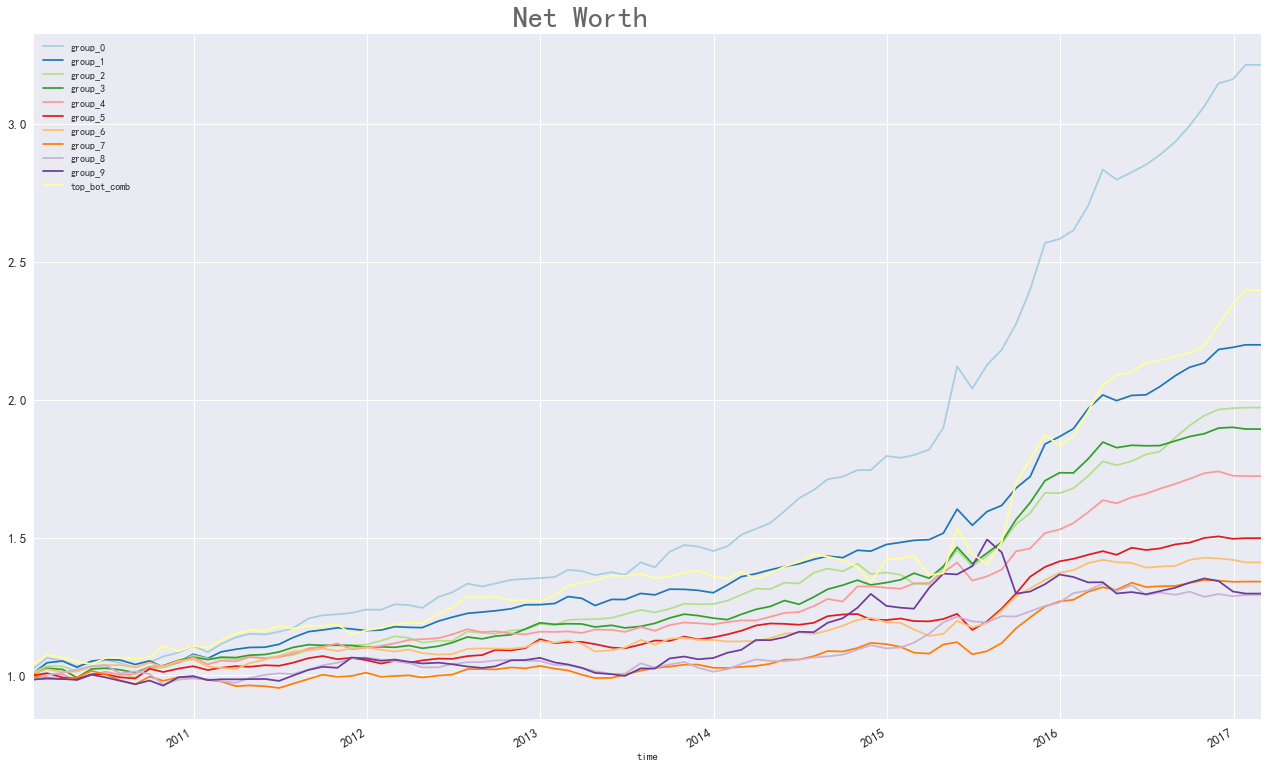

In [3548]:
indNetWorth = (finalReturn+1).cumprod()
fig = plt.figure(figsize=(14,9))
# Add a subplot
ax = fig.add_subplot(111)
indNetWorth.plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",11),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [3549]:
# basic indicator
annualizedReturnNew = (1+finalReturn.mean())**12 - 1
annualizedVolNew = finalReturn.std()* np.sqrt(12)
sharpeRatioNew = annualizedReturnNew / annualizedVolNew 
print 'Annual Return:','\n',annualizedReturnNew,'\n\n','Annual Volatility:','\n',annualizedVolNew,'\n\n','Sharpe Ratio:''\n',sharpeRatioNew

Annual Return: 
group_0         0.179902
group_1         0.117779
group_2         0.101018
group_3         0.094708
group_4         0.080059
group_5         0.059170
group_6         0.050246
group_7         0.042900
group_8         0.037583
group_9         0.039908
top_bot_comb    0.135087
dtype: float64 

Annual Volatility: 
group_0         0.073444
group_1         0.054108
group_2         0.056372
group_3         0.054107
group_4         0.047864
group_5         0.047913
group_6         0.046651
group_7         0.048119
group_8         0.047724
group_9         0.075738
top_bot_comb    0.100067
dtype: float64 

Sharpe Ratio:
group_0         2.449518
group_1         2.176722
group_2         1.792000
group_3         1.750368
group_4         1.672649
group_5         1.234959
group_6         1.077063
group_7         0.891551
group_8         0.787510
group_9         0.526923
top_bot_comb    1.349971
dtype: float64


In [3550]:
downsideRiskNew = finalReturn[finalReturn < finalReturn.mean()].std(skipna = True) * np.sqrt(12)
downsideRiskNew

group_0         0.038424
group_1         0.033095
group_2         0.035031
group_3         0.031219
group_4         0.033439
group_5         0.030896
group_6         0.026920
group_7         0.028184
group_8         0.031353
group_9         0.056275
top_bot_comb    0.052786
dtype: float64

In [3551]:
sortinoRatioNew = annualizedReturnNew / downsideRiskNew
sortinoRatioNew

group_0         4.682005
group_1         3.558864
group_2         2.883698
group_3         3.033618
group_4         2.394221
group_5         1.915177
group_6         1.866472
group_7         1.522133
group_8         1.198724
group_9         0.709166
top_bot_comb    2.559141
dtype: float64

In [3552]:
# Max drawdown
maxdd1 = indNetWorth.copy()
maxdd1.iloc[0] = 0
for date in indNetWorth.index[1:]:
    maxdd1.loc[date] = 1-indNetWorth.loc[date]/indNetWorth.loc[:date].max()
maxddInfo1 = pd.concat([maxdd1.max(),maxdd1.idxmax()],axis=1)
maxddInfo1.columns = ['Max_drawdown','Time']
maxddInfo1

,Max_drawdown,Time
group_0,0.038083,2015-06-30
group_1,0.036592,2015-06-30
group_2,0.053204,2015-03-31
group_3,0.040958,2015-06-30
group_4,0.046612,2015-06-30
group_5,0.047621,2015-06-30
group_6,0.053959,2015-03-31
group_7,0.061196,2011-06-30
group_8,0.066769,2010-10-29
group_9,0.132929,2016-06-30


In [3553]:
# calmar Ratio
calmarRatioNew = annualizedReturnNew/ maxddInfo1['Max_drawdown']
calmarRatioNew

group_0         4.724011
group_1         3.218683
group_2         1.898688
group_3         2.312306
group_4         1.717565
group_5         1.242527
group_6         0.931178
group_7         0.701035
group_8         0.562885
group_9         0.300223
top_bot_comb    1.580514
dtype: float64

In [3554]:
# save factor Information
savepath = 'C:/Users/LZJF_02/Desktop/myownliarbry'
infodata = np.array([[startTime,endTime,monoDF.median().values[0],monoDF.std().values[0],annualizedReturn['top_bot_comb'],annualizedVol['top_bot_comb'],sharpeRatio['top_bot_comb'],\
    downsideRisk['top_bot_comb'],sortinoRatio['top_bot_comb'], maxddInfo['Max_drawdown'].loc['top_bot_comb'],calmarRatio['top_bot_comb']]])
totalInfo = pd. DataFrame(index =[sololist[0].split('.')[0]],columns = ['Start_time','End_Time','Mono_median','Mono_std','Annualized_return','Annualized_volatility','Sharpe_ratio','Downside_Risk',
                                                     'Sortino_ratio','Max_drawdown','Calmar_Ratio'],data= infodata)
totalInfo.index.name = 'Factor_Name'
try:
    readfacInfo = pd.read_csv(savepath+'/'+'factorInfo.csv',infer_datetime_format=True,parse_dates=[0],index_col=0)
except:  
    readfacInfo = totalInfo
    readfacInfo.to_csv(savepath+'/'+'factorInfo.csv',na_rep='NaN')  
if  sololist[0].split('.')[0] in readfacInfo.index:
    print sololist[0].split('.')[0]+'already in the file!'
    pass
else:
    updatedInfo = pd.concat([readfacInfo,totalInfo])
    updatedInfo.to_csv(savepath+'/'+'factorInfo.csv',na_rep='NaN')

Own_Factor_Return_Skew_250Dalready in the file!


In [3555]:
updatedInfo

,Start_time,End_Time,Mono_median,Mono_std,Annualized_return,Annualized_volatility,Sharpe_ratio,Downside_Risk,Sortino_ratio,Max_drawdown,Calmar_Ratio
Factor_Name,,,,,,,,,,,
Own_Factor_Turnover_Volatility_deviation_20D,2010-01-01 00:00:00,2017-02-28 00:00:00,-0.927273,0.252882,0.19556,0.168607,1.15985,0.147415,1.32659,0.257361,0.759865
Own_Factor_ILLQ-1d,2010-01-01 00:00:00,2017-02-28 00:00:00,0.987879,0.157828,0.324461,0.261079,1.24277,0.204335,1.58788,0.397588,0.816074
Own_Factor_Idiosyncratic_Volatility,2010-01-01 00:00:00,2017-02-28 00:00:00,-0.90303,0.281116,0.189878,0.158741,1.19615,0.0980634,1.93628,0.152969,1.24128
Own_Factor_ADJ_Turnover_Volatility_20D,2010-01-01 00:00:00,2017-02-28 00:00:00,-1,0.220559,0.466077,0.297559,1.56633,0.363413,1.2825,0.62489,0.745854
LZ_GPA_VAL_PE,2010-01-01 00:00:00,2017-02-28 00:00:00,0.757576,0.224231,0.071443,0.207247,0.344724,0.16181,0.441522,0.301485,0.23697
LZ_GPA_VAL_PB,2010-01-01 00:00:00,2017-02-28 00:00:00,-0.0909091,0.448354,0.0311041,0.230665,0.134846,0.145905,0.21318,0.358193,0.0868362
LZ_GPA_VAL_PS,2010-01-01 00:00:00,2017-02-28 00:00:00,0.10303,0.522217,0.00701915,0.190525,0.0368411,0.109763,0.0639484,0.355447,0.0197474
LZ_GPA_FIN_IND_QFA_YOYGR,2010-01-01 00:00:00,2017-02-28 00:00:00,0.939394,0.156654,0.0879804,0.0708833,1.2412,0.048307,1.82128,0.0830553,1.0593
LZ_GPA_FIN_IND_YOYBPS,2010-01-01 00:00:00,2017-02-28 00:00:00,0.2,0.221057,0.0168831,0.0899121,0.187773,0.0573765,0.294251,0.167963,0.100516


In [3574]:
(maxddInfo1-maxddInfo)

,Max_drawdown,Time
group_0,-0.033868,0 days
group_1,-0.053942,214 days
group_2,-0.025547,123 days
group_3,-0.028827,214 days
group_4,-0.034646,0 days
group_5,-0.017693,0 days
group_6,-0.007624,-91 days
group_7,-0.017373,-701 days
group_8,0.010140,-1736 days
group_9,0.021665,1098 days


In [3557]:
#--------------------------------------  Section End   -------------------------------------

In [3558]:
industryDict = getIndustryDict(endOfMonthList,grouplabel,indusDF)

In [3559]:
capDict=getGroupsbyCap(LFCAPDF,endOfMonthList)

In [3560]:
templist=[endOfMonthList,['mean','median','std']]
capGroupsDF = pd.DataFrame(data=None, columns=['small','mid','huge'],index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)
indusGroupDF  = pd.DataFrame(data=None, columns=grouplabel,index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)

In [3561]:
for date in endOfMonthList:
    factorindice = factorData.loc[date]
    smallindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][0]))]
    midindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][1]))]
    hugeindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][2]))]
    capGroupsDF.loc[date,'small'] = [smallindice.mean(),smallindice.median(),smallindice.std()]
    capGroupsDF.loc[date,'mid'] = [midindice.mean(),midindice.median(),midindice.std()]
    capGroupsDF.loc[date,'huge'] = [hugeindice.mean(),hugeindice.median(),hugeindice.std()]
    for i in grouplabel:
        #print grouplabel
        inDFIndice = factorindice.loc[list(set(factorindice.index) & set(industryDict[date][i]))]
        indusGroupDF.loc[date,i] = [inDFIndice.mean(),inDFIndice.median(),inDFIndice.std()]
indusGroupDF.rename(columns = {i:u''+explanationDict[i]+'' for i in grouplabel},inplace=True)

In [3562]:
indusGroupDF

国防军工        家电          电力设备        煤炭        汽车  \
time       stats                                                          
2010-01-29 mean    0.161262  0.027646  1.637635e+05 -0.040776 -0.040902   
           median -0.043747 -0.105654 -1.166883e-01 -0.009088 -0.064107   
           std     1.543209  0.673942  1.725357e+06  0.164953  0.263623   
2010-02-26 mean    0.113862  0.044865  1.594539e+05 -0.052001 -0.056990   
           median -0.081308 -0.096540 -1.254486e-01 -0.050178 -0.056200   
           std     1.465179  0.700204  1.702503e+06  0.200564  0.280809   
2010-03-31 mean    0.007311  0.136563  6.903447e-02 -0.000857  0.082193   
           median -0.003270  0.039876 -4.545967e-02 -0.011706  0.103908   
           std     0.259483  0.782011  1.491846e+00  0.207258  0.304491   
2010-04-30 mean   -0.031186  0.102298  5.433022e-02 -0.088227  0.026853   
           median -0.057328 -0.022487 -6.983028e-02 -0.062938 -0.099264   
           std     0.272474  0.736565  1.476992e+00  0.235135  0.320242   
2010-05-31 mean   -0.075023  0.062681 -6.463730e-03 -0.160672 -0.029274   
           median -0.107398 -0.059299 -1.343401e-01 -0.092592 -0.095038   
           std     0.260515  0.732914  1.471140e+00  0.258813  0.357894   
2010-06-30 mean   -0.143542 -0.098391 -4.203796e-02 -0.191624 -0.087694   
           median -0.170198 -0.094387 -1.680848e-01 -0.135824 -0.091196   
           std     0.246564  0.216477  1.438834e+00  0.250869  0.338041   
2010-07-30 mean   -0.168365 -0.129427 -6.815928e-02 -0.197685 -0.112998   
           median -0.187780 -0.120298 -1.807610e-01 -0.181870 -0.122027   
           std     0.228834  0.224942  1.405121e+00  0.254521  0.339411   
2010-08-31 mean   -0.056445 -0.056333 -2.827165e-03 -0.140267 -0.032153   
           median -0.101264 -0.015992 -9.604134e-02 -0.129798 -0.120144   
           std     0.254896  0.252531  1.386495e+00  0.282936  0.394908   
2010-09-30 mean   -0.015140 -0.049425  5.720496e-02 -0.013587  0.005149   
           median -0.060371 -0.025878 -3.001369e-02  0.029519  0.008837   
           std     0.278013  0.243614  1.327639e+00  0.283214  0.385245   
2010-10-29 mean   -0.019730 -0.051913  8.202023e-02  0.001475  0.089404   
           median -0.041615 -0.024865 -8.788300e-03 -0.000705  0.090051   
           std     0.286665  0.260832  1.325426e+00  0.265915  0.368012   
...                     ...       ...           ...       ...       ...   
2016-05-31 mean   -0.222892 -0.086706 -2.615348e-01 -0.301526 -0.176366   
           median -0.206209 -0.210161 -2.521360e-01 -0.271927 -0.128741   
           std     0.202116  0.511154  2.045705e-01  0.152071  0.163206   
2016-06-30 mean   -0.271655 -0.134239 -2.950472e-01 -0.333143 -0.211284   
           median -0.248078 -0.251345 -2.896619e-01 -0.300641 -0.174477   
           std     0.254591  0.520949  2.126266e-01  0.166237  0.160423   
2016-07-29 mean   -0.268568 -0.166901 -2.747646e-01 -0.427608 -0.237692   
           median -0.272572 -0.299550 -3.086997e-01 -0.367867 -0.206005   
           std     0.315728  0.538346  3.052621e-01  0.310297  0.161722   
2016-08-31 mean   -0.271627 -0.185615 -2.750044e-01 -0.422384 -0.240345   
           median -0.264619 -0.327419 -3.149332e-01 -0.375213 -0.221518   
           std     0.307509  0.544869  3.245532e-01  0.329085  0.202300   
2016-09-30 mean   -0.259288 -0.286881 -2.862078e-01 -0.406581 -0.178781   
           median -0.297037 -0.413871 -3.407483e-01 -0.381557 -0.161401   
           std     0.382492  0.595736  3.767081e-01  0.435335  0.257618   
2016-10-31 mean   -0.297748 -0.299131 -2.764760e-01 -0.406367 -0.225794   
           median -0.276221 -0.435704 -3.254137e-01 -0.344308 -0.262763   
           std     0.413363  0.642429  4.210109e-01  0.517807  0.283606   
2016-11-30 mean   -0.458508 -0.464766 -3.904162e-01 -0.479843 -0.401044   
           median -0.369363 -0.536841 -4.372179e-01 -0.316481 -0.392930   
           std     0.445232  0.699910  4.587123e

In [3563]:
capGroupsDF.head()

small       mid      huge
time       stats                                   
2010-01-29 mean   -3.978699e+05  0.082983  0.072487
           median -1.063799e-01 -0.065809  0.030820
           std     1.030511e+07  1.310968  0.552257
2010-02-26 mean    4.077616e+06  0.060181  0.076352
           median -1.034501e-01 -0.077471  0.025282

In [3564]:
newstack = capGroupsDF.stack().unstack('stats').reset_index()
newstack = newstack.rename(columns = {'level_1':'cap'})
newstack = newstack.pivot_table(index='time',columns='cap')

In [3565]:
newstack.head()

stats           mean                            median                      \
cap             huge       mid         small      huge       mid     small   
time                                                                         
2010-01-29  0.072487  0.082983 -3.978699e+05  0.030820 -0.065809 -0.106380   
2010-02-26  0.076352  0.060181  4.077616e+06  0.025282 -0.077471 -0.103450   
2010-03-31  0.145413  0.126018  4.074317e+06  0.092155  0.002040 -0.068117   
2010-04-30  0.114848  0.055566  4.052836e+06  0.065491 -0.028018 -0.073751   
2010-05-31  0.028705  0.036631  4.031580e+06 -0.004434 -0.076028 -0.112379   

stats            std                          
cap             huge       mid         small  
time                                          
2010-01-29  0.552257  1.310968  1.030511e+07  
2010-02-26  0.811210  1.249629  9.659204e+07  
2010-03-31  0.811954  1.206354  9.693108e+07  
2010-04-30  0.818602  1.010469  9.667521e+07  
2010-05-31  0.502496  1.234758  9.642136e+07

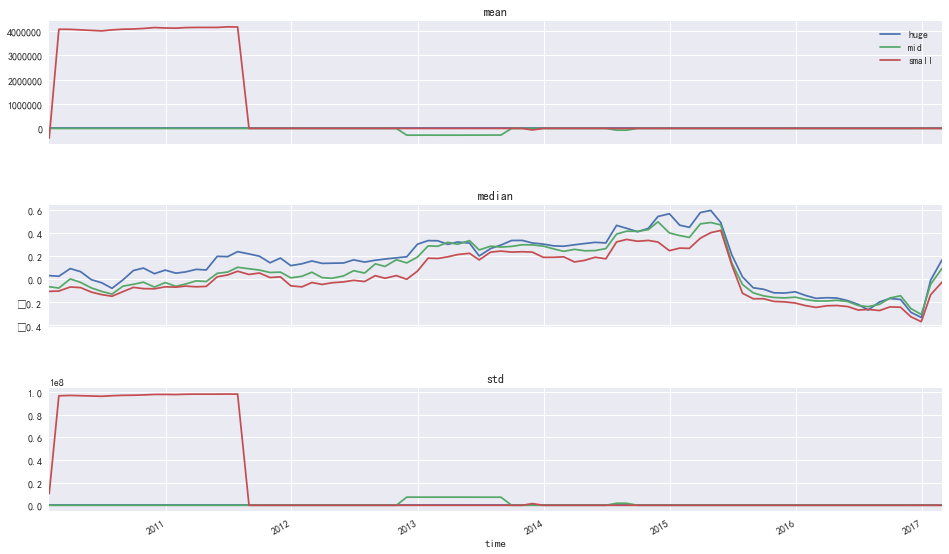

In [3566]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstack.columns.levels[0],range(len(newstack.columns.levels[0]))):
    newstack[label].plot(ax=axs[num],legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [3567]:
newstackInd = indusGroupDF.stack().unstack('stats').reset_index()
newstackInd = newstackInd.rename(columns = {'level_1':'industry'})
newstackInd = newstackInd.pivot_table(index='time',columns='industry')

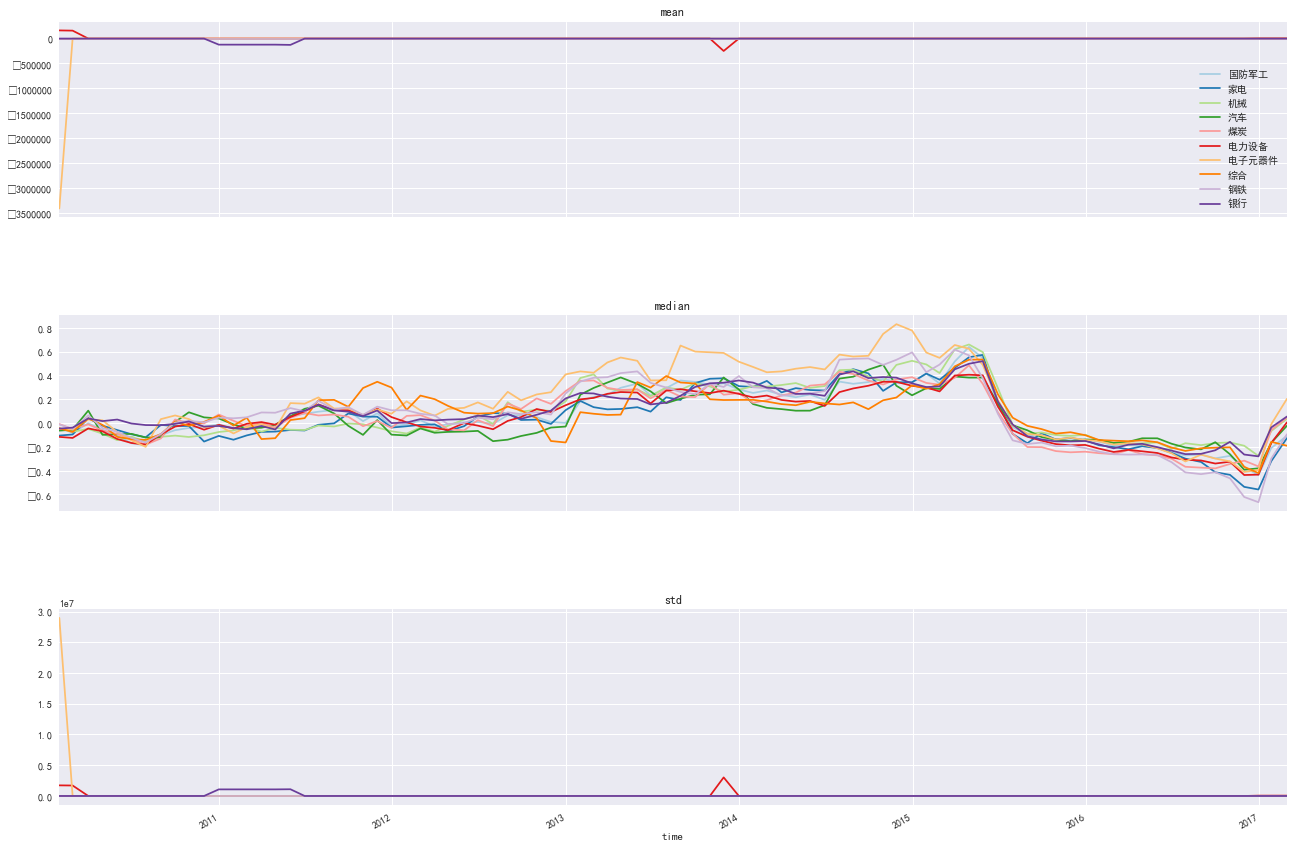

In [3568]:
fig, axs = plt.subplots(3,1, figsize=(22, 16), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstackInd.columns.levels[0],range(len(newstackInd.columns.levels[0]))):
    newstackInd[label].plot(ax=axs[num],color=sns.color_palette("Paired",10),legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [3569]:
capcopy=capGroupsDF.copy()
copydata=capcopy.reset_index()

In [3570]:
copydata.pivot_table(index='time',columns='stats').head()

small                               mid            \
stats               mean    median           std      mean    median   
time                                                                   
2010-01-29 -3.978699e+05 -0.106380  1.030511e+07  0.082983 -0.065809   
2010-02-26  4.077616e+06 -0.103450  9.659204e+07  0.060181 -0.077471   
2010-03-31  4.074317e+06 -0.068117  9.693108e+07  0.126018  0.002040   
2010-04-30  4.052836e+06 -0.073751  9.667521e+07  0.055566 -0.028018   
2010-05-31  4.031580e+06 -0.112379  9.642136e+07  0.036631 -0.076028   

                          huge                      
stats            std      mean    median       std  
time                                                
2010-01-29  1.310968  0.072487  0.030820  0.552257  
2010-02-26  1.249629  0.076352  0.025282  0.811210  
2010-03-31  1.206354  0.145413  0.092155  0.811954  
2010-04-30  1.010469  0.114848  0.065491  0.818602  
2010-05-31  1.234758  0.028705 -0.004434  0.502496

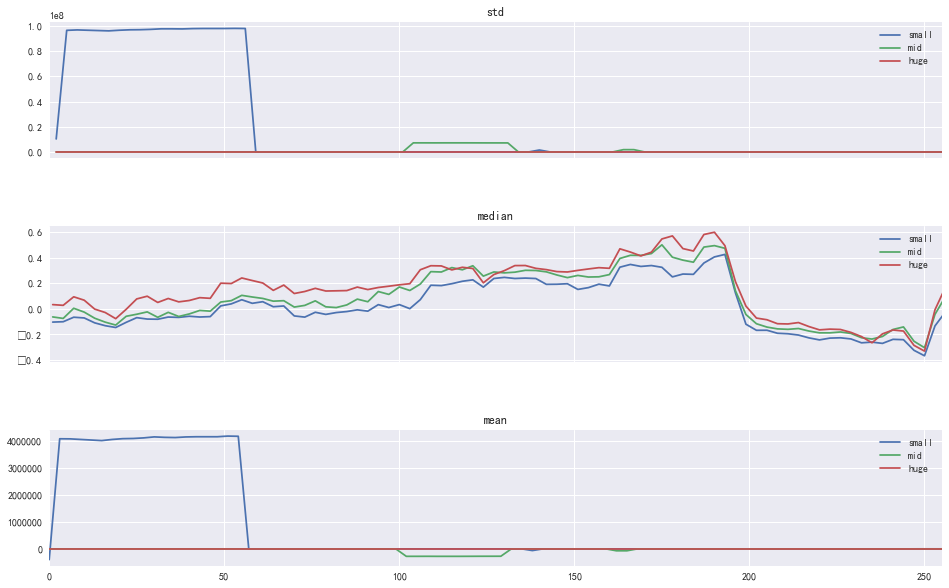

In [3571]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(set(copydata['stats']),range(len(set(copydata['stats'])))):
    #print label,num
    dataslice = copydata[copydata['stats']==label]
    dataslice.plot(ax=axs[num])
    axs[num].set_title(label)